In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples,)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [3]:
iris_data_set = load_iris()
x = pd.DataFrame(iris_data_set.data, columns=iris_data_set.feature_names)    #Put explanatory variable into x as pandasdata frame
y = pd.DataFrame(iris_data_set.target, columns=['Species'])    #Put iris response variable into y as pandasdata frame
df = pd.concat([x, y], axis=1)

In [4]:
col_name = df.columns.values
data = df[[col_name[0], col_name[2], col_name[4]]]
data = data[data["Species"] != 0]
data.head()

,sepal length (cm),petal length (cm),Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


#### 【問題1】ロジスティック回帰のクラスを作成する
ロジスティック回帰のクラスを作成し、Sprint2で作成した分類のパイプラインに組み込んでください。
クラスの基本構造はSprint3の線形回帰を参考にし、名前はScratchLogisticRegressionとしてください。
メソッドやパラメータなどはscikit-learnを参考にしてください。推定関係ではラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。
sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation
検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

In [5]:
train_feature, test_feature, train_target, test_target = train_test_split(data[['sepal length (cm)', 'petal length (cm)']].values, data['Species'].values, test_size=0.4, random_state=48)

In [6]:
#学習データの特徴量を標準化
scaler = StandardScaler()
scaler.fit(train_feature)
train_feature = scaler.transform(train_feature)

scaler.fit(test_feature)
test_feature = scaler.transform(test_feature)

In [7]:
import utils.ScratchLogisticRegression as cScratchLogisticRegr

In [8]:
#正則化項無し
clf = cScratchLogisticRegr.ScratchLogisticRegression(num_iter=20000, lr=0.1, bias=True, verbose=True, C=0)

In [9]:
#正則化項有り
clf_w_reg = cScratchLogisticRegr.ScratchLogisticRegression(num_iter=20000, lr=0.1, bias=True, verbose=True, C=1.5)

In [10]:
clf.fit(train_feature, train_target, test_feature, test_target)

Initial theta:
[[0.8]
 [0.9]
 [0.1]]
Theta:
 [[ 0.35631997]
 [-2.77327428]
 [13.27499634]]
Feature:
 [[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.        ]
 [ 0.89810697  1.9636576  -1.99410191 -1.23299431 -0.62410823 -0.47188671
  -2.14632343  0.59366393 -0.16744367  0.59366393  0.89810697  1.50699304
   0.74588545  0.13699937 -0.47188671  0.13699937  0.28922089 -0.01522215
  -0.015

In [11]:
clf_w_reg.fit(train_feature, train_target, test_feature, test_target)

Initial theta:
[[0.7]
 [0.7]
 [0.2]]
Theta:
 [[ 0.17651677]
 [-1.88612796]
 [ 9.88069588]]
Feature:
 [[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.        ]
 [ 0.89810697  1.9636576  -1.99410191 -1.23299431 -0.62410823 -0.47188671
  -2.14632343  0.59366393 -0.16744367  0.59366393  0.89810697  1.50699304
   0.74588545  0.13699937 -0.47188671  0.13699937  0.28922089 -0.01522215
  -0.015

#### 【問題2】学習曲線のプロット
学習曲線をプロットしてください。

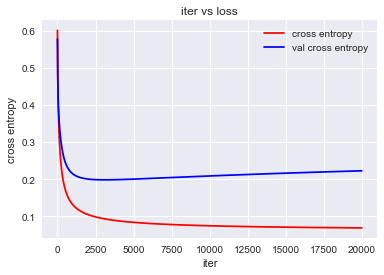

In [12]:
#正則化項無し
clf.plot_cross_entropy()

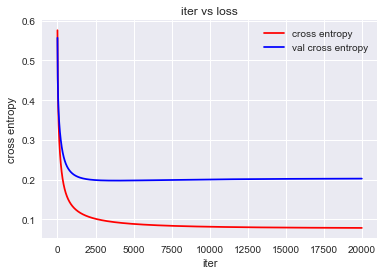

In [13]:
#正則化項有り
clf_w_reg.plot_cross_entropy()

正則化項無しの場合は、学習とともに学習データとテストデータの差が広がって行くが、正則化項を追加すると差の広がりが鈍くなる。（過学習を抑制している）

#### 【問題3】指標値の算出
分類に関する指標値で精度を確認してください

#### 正則化項無し　指標値

In [14]:
#正則化無し
pred = clf.predict(test_feature)
print(pred)
print(test_target)

[2 1 2 1 1 2 2 1 2 2 1 2 2 2 2 1 2 2 1 2 1 1 2 2 1 2 2 1 2 1 1 1 1 1 1 2 1
 1 2 1]
[2 1 2 1 1 2 2 1 2 2 1 2 2 2 2 1 2 2 1 2 1 1 2 2 2 2 2 1 1 1 2 1 1 1 1 2 1
 1 2 1]


In [15]:
clf.view_summary(pred, test_target)

tp=19 tn=18 fp=2 fn=1


In [16]:
clf.cal_accuracy(pred, test_target)

0.925

In [17]:
clf.cal_precision(pred, test_target)

0.9047619047619048

In [18]:
clf.cal_recall(pred, test_target)

0.95

In [19]:
clf.cal_f1(pred, test_target)

0.9268292682926829

#### 正則化項有り　指標値

In [20]:
#正則化有り
pred_w_reg = clf.predict(test_feature)
print(pred)
print(test_target)

[2 1 2 1 1 2 2 1 2 2 1 2 2 2 2 1 2 2 1 2 1 1 2 2 1 2 2 1 2 1 1 1 1 1 1 2 1
 1 2 1]
[2 1 2 1 1 2 2 1 2 2 1 2 2 2 2 1 2 2 1 2 1 1 2 2 2 2 2 1 1 1 2 1 1 1 1 2 1
 1 2 1]


In [21]:
clf_w_reg.view_summary(pred, test_target)

tp=19 tn=18 fp=2 fn=1


In [22]:
clf_w_reg.cal_accuracy(pred, test_target)

0.925

In [23]:
clf_w_reg.cal_precision(pred, test_target)

0.9047619047619048

In [24]:
clf_w_reg.cal_recall(pred, test_target)

0.95

In [25]:
clf_w_reg.cal_f1(pred, test_target)

0.9268292682926829

#### 【問題4】決定領域の可視化
2値分類のデータセットに対して決定領域を可視化してください。

In [26]:
#-dot(θ, x)が境界線（確率50%）となる。　ς(θx) = 0.5

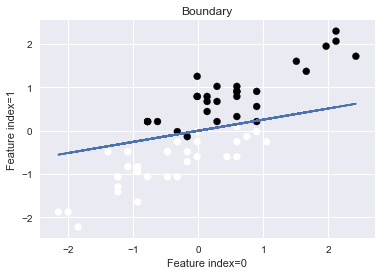

In [27]:
#正則化項無し
clf.plot_boundary(train_feature, train_target, 0, 1)

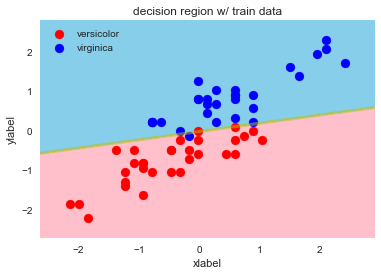

In [28]:
decision_region(train_feature, 
                train_target, 
                clf,
                step=0.01, 
                title='decision region w/ train data', 
                xlabel='xlabel', 
                ylabel='ylabel', 
                target_names=['versicolor', 'virginica'])

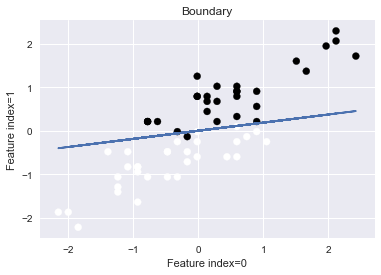

In [43]:
#正則化項有り
clf_w_reg.plot_boundary(train_feature, train_target, 0, 1)

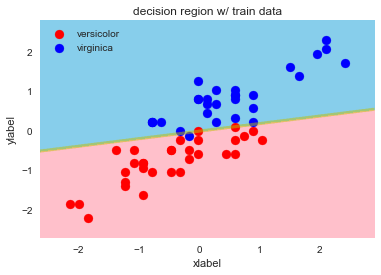

In [29]:
decision_region(train_feature, 
                train_target, 
                clf_w_reg,
                step=0.01, 
                title='decision region w/ train data', 
                xlabel='xlabel', 
                ylabel='ylabel', 
                target_names=['versicolor', 'virginica'])

#### 【問題5】（アドバンス課題）重みの保存
検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやnumpy.savezを利用します。
pickle — Python オブジェクトの直列化 — Python 3.7.1 ドキュメント
numpy.savez — NumPy v1.15 Manual

In [30]:
clf_5 = cScratchLogisticRegr.ScratchLogisticRegression(num_iter=20000, lr=0.1, bias=False, verbose=True, C=0)

In [31]:
clf_5.fit(train_feature, train_target, test_feature, test_target)

Initial theta:
[[0.7]
 [0.1]]
Theta:
 [[-2.59139437]
 [12.97545551]]
Feature:
 [[ 0.89810697  1.9636576  -1.99410191 -1.23299431 -0.62410823 -0.47188671
  -2.14632343  0.59366393 -0.16744367  0.59366393  0.89810697  1.50699304
   0.74588545  0.13699937 -0.47188671  0.13699937  0.28922089 -0.01522215
  -0.01522215 -0.31966519 -1.08077279 -0.01522215 -1.08077279 -0.16744367
   0.13699937  0.59366393 -0.92855127 -0.77632975 -0.92855127  2.11587912
   0.28922089  0.59366393  0.59366393  0.44144241 -0.31966519 -0.31966519
  -0.01522215 -0.16744367  0.28922089 -1.23299431  0.59366393  0.59366393
  -0.47188671  0.59366393 -0.92855127 -1.23299431 -0.01522215 -0.01522215
  -0.92855127  1.65921456 -1.38521583 -0.77632975  0.89810697 -0.77632975
  -1.84188039  0.89810697  2.11587912  2.42032216 -0.77632975  1.05032849]
 [ 0.55982887  1.94974882 -1.87253104 -1.06174441  0.21234888 -0.48261109
  -1.87253104 -0.25095777 -0.13513111  0.32817554 -0.01930444  1.60226883
  -0.13513111  0.44400221 -1.061

In [32]:
#1. ”clf_5”インスタンスで求めたパラメータをtest.npzに保存
clf_5.save_param("test.npz")

In [33]:
#試しにrecall
clf_5.recall_param("test.npz")

recall param=
 [[-2.59139437]
 [12.97545551]]


In [34]:
#2. 新しいインスタンス"clf_5_new"を生成（パラメータ未調整）
clf_5_new = cScratchLogisticRegr.ScratchLogisticRegression(num_iter=20000, lr=0.1, bias=False, verbose=True, C=0)

In [35]:
#3. ”clf_5”インスタンスで求めたパラメータをtest.npzから呼び出し"clf_5_new"のパラメータに設定
clf_5_new.recall_param("test.npz")

recall param=
 [[-2.59139437]
 [12.97545551]]


In [36]:
#4. "clf_5_new"のpredictで予測し結果を確認
pred_w_reg = clf_5_new.predict(test_feature)
print(pred)
print(test_target)

[2 1 2 1 1 2 2 1 2 2 1 2 2 2 2 1 2 2 1 2 1 1 2 2 1 2 2 1 2 1 1 1 1 1 1 2 1
 1 2 1]
[2 1 2 1 1 2 2 1 2 2 1 2 2 2 2 1 2 2 1 2 1 1 2 2 2 2 2 1 1 1 2 1 1 1 1 2 1
 1 2 1]


##### 結果
別インスタンスで保存したパラメータを自身のパラメータとして設定し予測を行うことができた。

In [37]:
#Pickleを使ってみる
import pickle

In [38]:
theta = clf_5_new.theta

In [39]:
with open('param.binaryfile', 'wb') as handler:
  pickle.dump(theta, handler)

In [40]:
with open('param.binaryfile', 'rb') as handler:
  reload_theta = pickle.load(handler)
  print(reload_theta)

[[-2.59139437]
 [12.97545551]]
